In [6]:
import torch
import torchvision

In [7]:
import torch
from torchvision import models
model = models.alexnet(pretrained=True)
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Classification reports


Number of classes for classification: 1000



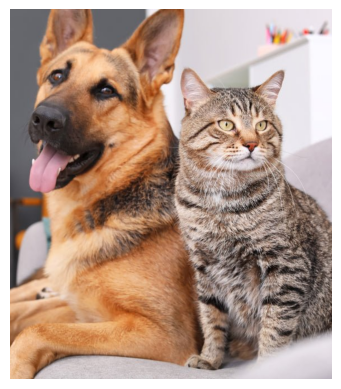

'images/living-with-cats-dogs-689902.jpg': 26.31% is a 'tiger cat'

Top 5 predictions:
26.31% is a 'tiger cat'
13.07% is a 'tabby, tabby cat'
12.57% is a 'German shepherd, German shepherd dog, German police dog, alsatian'
12.48% is a 'Egyptian cat'
8.63% is a 'tiger, Panthera tigris'

--------------------------------------------------



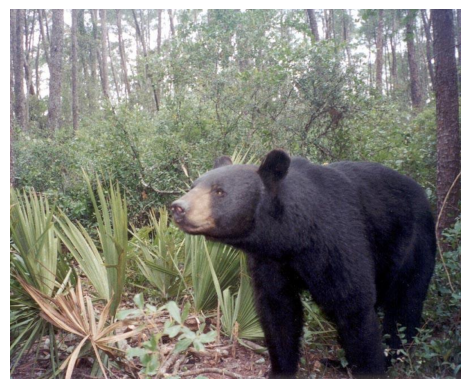

'images/black_bear.jpg': 87.53% is a 'American black bear, black bear, Ursus americanus, Euarctos americanus'

Top 5 predictions:
87.53% is a 'American black bear, black bear, Ursus americanus, Euarctos americanus'
5.45% is a 'brown bear, bruin, Ursus arctos'
3.21% is a 'wild boar, boar, Sus scrofa'
2.67% is a 'sloth bear, Melursus ursinus, Ursus ursinus'
0.19% is a 'hog, pig, grunter, squealer, Sus scrofa'

--------------------------------------------------



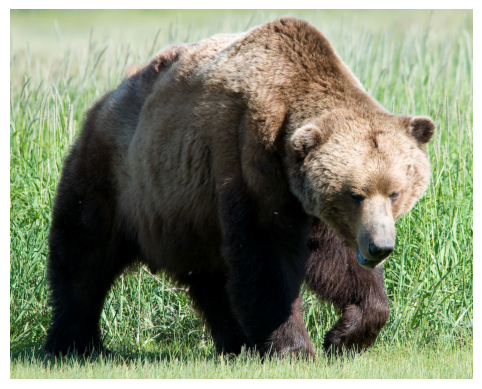

'images/brown_bear.jpg': 93.29% is a 'brown bear, bruin, Ursus arctos'

Top 5 predictions:
93.29% is a 'brown bear, bruin, Ursus arctos'
5.05% is a 'bison'
1.15% is a 'American black bear, black bear, Ursus americanus, Euarctos americanus'
0.29% is a 'wombat'
0.08% is a 'sloth bear, Melursus ursinus, Ursus ursinus'

--------------------------------------------------



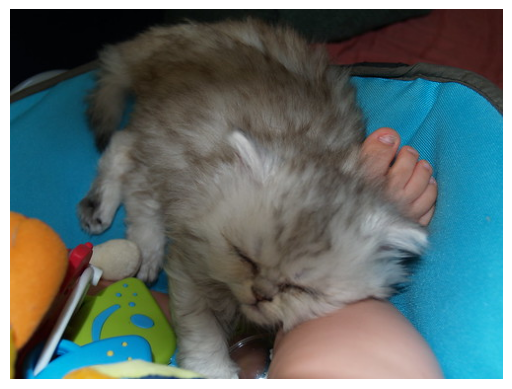

'images/cat.jpg': 85.86% is a 'Persian cat'

Top 5 predictions:
85.86% is a 'Persian cat'
4.71% is a 'Egyptian cat'
4.17% is a 'lynx, catamount'
1.64% is a 'tabby, tabby cat'
0.66% is a 'Angora, Angora rabbit'

--------------------------------------------------



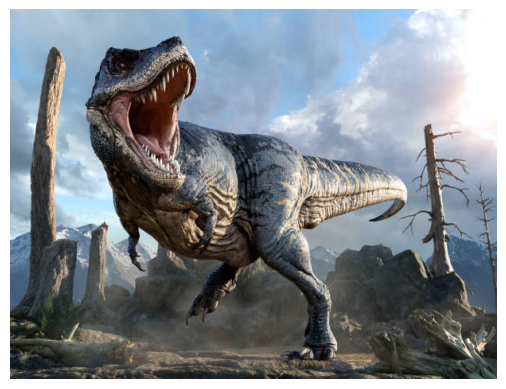

'images/dinosaur.jpg': 36.53% is a 'triceratops'

Top 5 predictions:
36.53% is a 'triceratops'
13.08% is a 'sturgeon'
11.31% is a 'common iguana, iguana, Iguana iguana'
5.65% is a 'rock python, rock snake, Python sebae'
3.65% is a 'leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea'

--------------------------------------------------



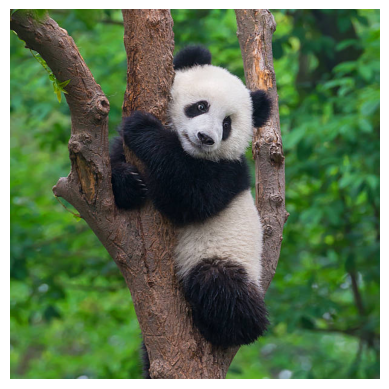

'images/panda.jpg': 99.97% is a 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca'

Top 5 predictions:
99.97% is a 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca'
0.02% is a 'indri, indris, Indri indri, Indri brevicaudatus'
0.00% is a 'gibbon, Hylobates lar'
0.00% is a 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens'
0.00% is a 'titi, titi monkey'

--------------------------------------------------



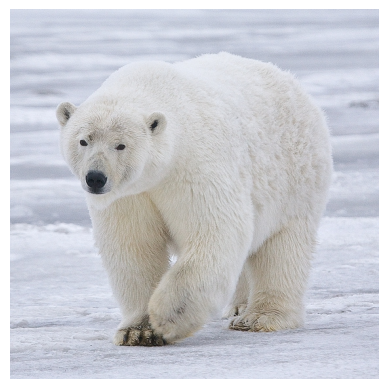

'images/polar_bear.jpg': 99.88% is a 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus'

Top 5 predictions:
99.88% is a 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus'
0.10% is a 'white wolf, Arctic wolf, Canis lupus tundrarum'
0.02% is a 'Arctic fox, white fox, Alopex lagopus'
0.00% is a 'Samoyed, Samoyede'
0.00% is a 'kuvasz'

--------------------------------------------------

Number of classes for classification: 1000
Input image size for AlexNet: 224x224
Number of layers in AlexNet: 8 (5 convolutional + 3 fully connected)


In [8]:
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms, models
import torch
import os

model = models.alexnet(pretrained=True)
model.eval()

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

with open('./imagenet_synsets.txt', 'r') as f:
    synsets = [x.strip() for x in f.readlines()]
splits = [line.split(' ') for line in synsets]
key_to_classname = {spl[0]: ' '.join(spl[1:]) for spl in splits}

with open('./imagenet_classes.txt', 'r') as f:
    class_id_to_key = [x.strip() for x in f.readlines()]

print(f"Number of classes for classification: {len(class_id_to_key)}\n")

def classify_image(filename):
    input_image = Image.open(filename)
    plt.imshow(input_image)
    plt.axis('off')
    plt.show()
    
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0)
    
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')
    
    with torch.no_grad():
        output = model(input_batch)
    
    percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
    
    _, index = torch.max(output, 1)
    classname = key_to_classname[class_id_to_key[index[0]]]
    probability = percentage[index[0]].item()
    
    print(f"'{filename}': {probability:.2f}% is a '{classname}'\n")
    
    _, indices = torch.sort(output, descending=True)
    print("Top 5 predictions:")
    for idx in indices[0][:5]:
        print(f"{percentage[idx].item():.2f}% is a '{key_to_classname[class_id_to_key[idx]]}'")
    print("\n" + "-"*50 + "\n")

image_files = ['images/living-with-cats-dogs-689902.jpg', 'images/black_bear.jpg', 'images/brown_bear.jpg', 'images/cat.jpg', 'images/dinosaur.jpg', 'images/panda.jpg', 'images/polar_bear.jpg']

for img_file in image_files:
    classify_image(img_file)

print(f"Number of classes for classification: {len(class_id_to_key)}")
print("Input image size for AlexNet: 224x224")
print("Number of layers in AlexNet: 8 (5 convolutional + 3 fully connected)")
